# **Experiment Notebook**



In [135]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [136]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import altair as alt

---
## A. Project Description


In [138]:
student_name = "Fang Yee Tan"
student_id = "25677648"

In [139]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [140]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## C. Data Understanding

### C.1   Load Datasets


In [141]:
from pathlib import Path
file_path = Path.home() / "Desktop" / "36120" / "Assignment2"

X_train = pd.read_csv(file_path / "X_train.csv")
X_val = pd.read_csv(file_path / "X_val.csv")
X_test = pd.read_csv(file_path / "X_test.csv")
y_train = pd.read_csv(file_path / "y_train.csv").squeeze()
y_val = pd.read_csv(file_path / "y_val.csv").squeeze()
y_test = pd.read_csv(file_path / "y_test.csv").squeeze()

## D. Feature Selection

### D.1 Approach "Random Forest Feature Importance"

In [142]:
X_train.columns

Index(['relative_humidity_2m_mean', 'cloud_cover_mean', 'cloud_cover_max',
       'cloud_cover_min', 'wind_gusts_10m_mean', 'wind_speed_10m_mean',
       'dew_point_2m_mean', 'wet_bulb_temperature_2m_mean',
       'pressure_msl_mean', 'vapour_pressure_deficit_max',
       'shortwave_radiation_sum', 'precipitation_hours', 'temperature_2m_mean',
       'wind_gusts_10m_max', 'wind_speed_10m_max',
       'et0_fao_evapotranspiration', 'temperature_range', 'pressure_range',
       'wind_direction_sin', 'wind_direction_cos', 'rain_occurred',
       'rain_occurred_lag_1', 'rain_occurred_lag_2', 'rain_occurred_lag_3',
       'weather_code_0.0', 'weather_code_1.0', 'weather_code_2.0',
       'weather_code_3.0', 'weather_code_51.0', 'weather_code_53.0',
       'weather_code_55.0', 'weather_code_61.0', 'weather_code_63.0',
       'weather_code_65.0', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12'],

In [143]:
selected_features =['relative_humidity_2m_mean', 'cloud_cover_mean',
        'wind_gusts_10m_mean', 'wind_speed_10m_max',
       'dew_point_2m_mean', 'wet_bulb_temperature_2m_mean',
       'shortwave_radiation_sum', 'temperature_2m_mean',
        'wind_gusts_10m_max', 'wind_direction_sin']

X_train = X_train[selected_features]
X_val = X_val[selected_features]
X_test = X_test[selected_features]

In [144]:
feature_selection_1_insights = """In Experiment 2, feature importance derived from the random forest model is used to guide feature selection by identifying which variables contribute most to the model’s predictive power. This approach is chosen because random forests inherently measure each feature’s impact on reducing prediction error, making them a reliable tool for evaluating feature relevance in complex, nonlinear datasets. Consequently, less important features will be removed to simplify the model, reduce noise, and mitigate overfitting. By focusing only on the most informative features, this method aims to improve the model’s generalisation and overall performance in subsequent experiments."""

In [145]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [146]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [147]:
# Critical Success Index (CSI)
def critical_success_index(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    csi = tp / (tp + fp + fn)
    return csi

In [148]:
performance_metrics_explanations = """Accuracy measures how well the model correctly predicts both rain and no-rain cases, providing an overall view of performance. However, due to the dataset’s imbalance, precision, recall, and F1-score offer more meaningful insights. In this project, the F1-score is the primary metric because it balances precision and recall, which is essential when both false positives and false negatives have significant impacts. The confusion matrix further breaks down prediction results into true positives, true negatives, false positives, and false negatives, giving a clearer picture of the model’s strengths and weaknesses. Additionally, the Critical Success Index (CSI) is introduced to assess forecast skill specifically in meteorological contexts. Together, these metrics provide a comprehensive evaluation of model effectiveness."""

In [149]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

Null hypothesis: The performance of the Random Forest model with feature selection is not significantly better than the performance of the Random Forest model using all features.

Alternative hypothesis: The performance of the Random Forest model with feature selection is significantly better than the performance of the Random Forest model using all features.

### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
algorithm_selection_explanations = """Random Forest is selected for this task because of its capability to model complex and non-linear relationships between the input features and the target variable, which logistic regression may not capture effectively. It functions by constructing an ensemble of decision trees, each trained on a random subset of the data, and then aggregates their predictions to improve overall accuracy and reduce model variance. This ensemble approach contributes to increased robustness and improved generalisation to unseen data, helping to minimise overfitting. In addition, Random Forest provides interpretable feature importance scores, which offer valuable insights into the relative contribution of each variable in predicting rainfall."""

In [152]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [153]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [154]:
# Set up the parameter grid
param_grid = {
    'class_weight': ['balanced'],
    'n_estimators': [400],
    'max_depth': [3],
    'min_samples_split': [3],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

In [3]:
# Time series cross validation
tscv = TimeSeriesSplit(n_splits=5)

# Grid search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=34),
    param_grid=param_grid,
    cv=tscv,
    scoring='f1', 
    n_jobs=-1,     
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1 score: {grid_search.best_score_:.4f}")

NameError: name 'TimeSeriesSplit' is not defined

In [1]:
hyperparameters_selection_explanations = """Class weight is used to address class imbalance by assigning greater importance to minority classes, thereby improving the model’s ability to detect infrequent events. The number of estimators determines the size of the ensemble, balancing predictive performance with computational efficiency. Maximum depth limits the complexity of individual trees, acting as a regularisation technique to prevent overfitting. The minimum number of samples required for node splitting and leaf formation controls tree growth, promoting smoother models and enhancing generalisation to unseen data. Finally, the maximum features parameter introduces randomness in feature selection at each split, reducing correlation between trees and increasing the robustness of the ensemble.
"""

In [2]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

NameError: name 'print_tile' is not defined

### J.3 Fit Model

In [158]:
best_rf = grid_search.best_estimator_

### J.4 Model Technical Performance

> Provide some explanations on model performance


In [159]:
# Predictions on validation dataset
y_val_pred = best_rf.predict(X_val)

In [160]:
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
csi_score = critical_success_index(y_val, y_val_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Critical Success Index (CSI): {csi_score:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Accuracy: 0.63
Precision: 0.45
Recall: 0.60
F1 Score: 0.51
Critical Success Index (CSI): 0.35

Confusion Matrix:
[[160  87]
 [ 47  71]]


In [161]:
# Predictions on testing dataset
y_test_pred = best_rf.predict(X_test)

In [162]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
csi_score = critical_success_index(y_test, y_test_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Critical Success Index (CSI): {csi_score:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Accuracy: 0.56
Precision: 0.41
Recall: 0.52
F1 Score: 0.46
Critical Success Index (CSI): 0.30

Confusion Matrix:
[[133  96]
 [ 62  67]]


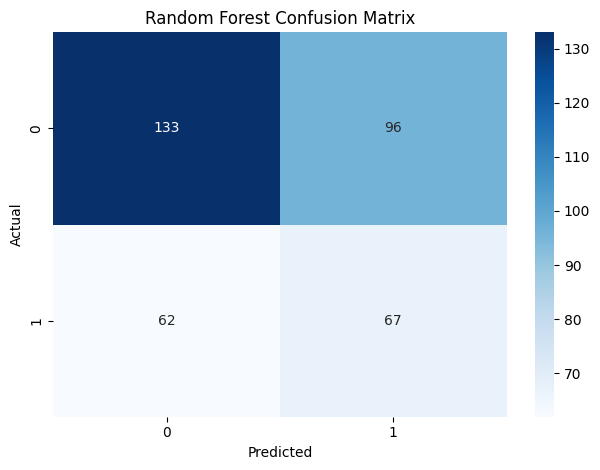

In [173]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure()
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues', fmt = 'd')

plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

In [163]:
best_rf.feature_importances_

array([0.06969756, 0.06229394, 0.05189981, 0.09736552, 0.22381029,
       0.16630878, 0.06350742, 0.15611023, 0.04579249, 0.06321397])

In [164]:
feat_imp_rf_df = pd.DataFrame(
    {
        'feature': X_train.columns,
        'feature_importance': best_rf.feature_importances_
     }
)

In [165]:
feat_imp_rf_df = feat_imp_rf_df.sort_values('feature_importance', ascending=False).reset_index(drop=True)
feat_imp_rf_df.head(20)

,feature,feature_importance
0,dew_point_2m_mean,0.223810
1,wet_bulb_temperature_2m_mean,0.166309
2,temperature_2m_mean,0.156110
3,wind_speed_10m_max,0.097366
4,relative_humidity_2m_mean,0.069698
5,shortwave_radiation_sum,0.063507
6,wind_direction_sin,0.063214
7,cloud_cover_mean,0.062294
8,wind_gusts_10m_mean,0.051900
9,wind_gusts_10m_max,0.045792


In [166]:
alt.Chart(feat_imp_rf_df).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance'])

alt.Chart(...)

In [167]:
model_performance_explanations = """After selecting the top 10 features based on feature importance from the previous Random Forest model, the overall model performance shows some improvement, but the gain is not substantial. While eliminating less informative features helps reduce model complexity and slightly improves performance, the improvement is not significant. The presence of overfitting is evident, as shown by a noticeable drop in recall from 0.60 on the validation dataset to 0.52 on the testing dataset. This indicates that the model does not generalise well to unseen data and may be overfitting to patterns found in the training datasets. Although feature selection has a positive impact, the model still struggles with generalisation, despite being properly trained on the training dataset."""

In [168]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [171]:
business_impacts_explanations = """The experimental results show some improvement, however, recall (0.52) and F1 score (0.46) remain low, especially on unseen test dataset. This indicates the model struggles to correctly identify all rain events, missing a significant number of true positives. From a business perspective, this is critical because false negatives, failing to predict rain when it actually occurs, can lead to inadequate preparation, increased safety risks and potentially costly damages or unexpected accidents. On the other hand, false positives, predicting rain when there is none, also have consequences, such as unnecessary resource allocation or operational adjustments, but these are generally less severe than the impact of false negatives in this context."""

In [172]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [109]:
experiment_outcome = """Hypothesis Confirmed"""

In [110]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [169]:
experiment_results_explanations = """Although the experiment shows some improvement after applying feature selection by retaining the top 10 features, the gains are minimal and not clearly significant. This suggests that the Random Forest model may have limitations in capturing the underlying complexity of the dataset, and a more advanced model, such as XGBoost, may be better suited for the task. As a result, further experimentation is both justified and necessary to meet the business objective of accurately predicting rain events, where achieving high recall is critical. The next steps will involve testing XGBoost, which is expected to offer stronger predictive performance, tuning model hyperparameters to optimise results, and addressing class imbalance through techniques such as class weighting. These experiments are expected to deliver measurable improvements, with XGBoost and class imbalance handling likely providing the most significant performance gains."""

In [170]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)